**MiniProject 3 - Human Resources**

project file link : https://www.kaggle.com/jacksonchou/hr-data-for-analytics

In [ ]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Copy of HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.insert(0, 'S.No', range(1, 1 + len(df)))
print(tabulate(df.head(10), headers='keys', tablefmt='grid', showindex=True))

+----+--------+----------------------+-------------------+------------------+------------------------+----------------------+-----------------+--------+-------------------------+---------+----------+
|    |   S.No |   satisfaction_level |   last_evaluation |   number_project |   average_montly_hours |   time_spend_company |   Work_accident |   left |   promotion_last_5years | sales   | salary   |
+====+========+======================+===================+==================+========================+======================+=================+========+=========================+=========+==========+
|  0 |      1 |                 0.38 |              0.53 |                2 |                    157 |                    3 |               0 |      1 |                       0 | sales   | low      |
+----+--------+----------------------+-------------------+------------------+------------------------+----------------------+-----------------+--------+-------------------------+---------+----------+


**1) How many employees in each of the department (use column "sales")**

In [ ]:
department_employee_count = df.groupby('sales')['S.No'].count().reset_index()
department_employee_count = department_employee_count.rename(columns={'S.No': 'num_employees'})
department_employee_count = department_employee_count.sort_values('num_employees', ascending=True)
print(tabulate(department_employee_count, headers='keys', tablefmt='grid', showindex=True))

+----+-------------+-----------------+
|    | sales       |   num_employees |
+====+=============+=================+
|  4 | management  |             630 |
+----+-------------+-----------------+
|  3 | hr          |             739 |
+----+-------------+-----------------+
|  2 | accounting  |             767 |
+----+-------------+-----------------+
|  1 | RandD       |             787 |
+----+-------------+-----------------+
|  5 | marketing   |             858 |
+----+-------------+-----------------+
|  6 | product_mng |             902 |
+----+-------------+-----------------+
|  0 | IT          |            1227 |
+----+-------------+-----------------+
|  8 | support     |            2229 |
+----+-------------+-----------------+
|  9 | technical   |            2720 |
+----+-------------+-----------------+
|  7 | sales       |            4140 |
+----+-------------+-----------------+


**2) Among employees who left, get the department wise (use column "sales"), number of employees and rank them.**


In [ ]:
print("The table below should show rank from 1 to 10 in ascending order having rank 1 on the top.")
left_employees = df[df['left'] == 1]
department_left_employee_count = left_employees.groupby('sales')['S.No'].count().reset_index()
department_left_employee_count = department_left_employee_count.rename(columns={'S.No': 'num_employees'})
department_left_employee_count['rank'] = department_left_employee_count['num_employees'].rank(ascending=False)
department_left_employee_count = department_left_employee_count.sort_index(ascending=True)
print(tabulate(department_left_employee_count, headers='keys', tablefmt='grid', showindex=True))

The table below should show rank from 1 to 10 in ascending order having rank 1 on the top.
+----+-------------+-----------------+--------+
|    | sales       |   num_employees |   rank |
+====+=============+=================+========+
|  0 | IT          |             273 |      4 |
+----+-------------+-----------------+--------+
|  1 | RandD       |             121 |      9 |
+----+-------------+-----------------+--------+
|  2 | accounting  |             204 |      6 |
+----+-------------+-----------------+--------+
|  3 | hr          |             215 |      5 |
+----+-------------+-----------------+--------+
|  4 | management  |              91 |     10 |
+----+-------------+-----------------+--------+
|  5 | marketing   |             203 |      7 |
+----+-------------+-----------------+--------+
|  6 | product_mng |             198 |      8 |
+----+-------------+-----------------+--------+
|  7 | sales       |            1014 |      1 |
+----+-------------+-----------------+-------

**3) Average number of years (time_spend_company) and average number of monthly hours (average_monthly_hours) for the employees left and not left under each department. Sort the value by sales.**

In [ ]:
avg_time_spend_company_and_hours = df.groupby(['left', 'sales'])[['time_spend_company', 'average_montly_hours']].mean().reset_index()
avg_time_spend_company_and_hours = avg_time_spend_company_and_hours.rename(columns={'time_spend_company': 'avg_time_spend_company', 'average_montly_hours': 'avg_average_monthly_hours'})
avg_time_spend_company_and_hours = avg_time_spend_company_and_hours.sort_values(['sales'], ascending=True)
avg_time_spend_company_and_hours = avg_time_spend_company_and_hours.sort_index(ascending=True)
print(tabulate(avg_time_spend_company_and_hours, headers='keys', tablefmt='grid', showindex=True))


+----+--------+-------------+--------------------------+-----------------------------+
|    |   left | sales       |   avg_time_spend_company |   avg_average_monthly_hours |
+====+========+=============+==========================+=============================+
|  0 |      0 | IT          |                  3.35639 |                     198.887 |
+----+--------+-------------+--------------------------+-----------------------------+
|  1 |      0 | RandD       |                  3.25225 |                     198.952 |
+----+--------+-------------+--------------------------+-----------------------------+
|  2 |      0 | accounting  |                  3.42451 |                     199.037 |
+----+--------+-------------+--------------------------+-----------------------------+
|  3 |      0 | hr          |                  3.19275 |                     199.25  |
+----+--------+-------------+--------------------------+-----------------------------+
|  4 |      0 | management  |              

**4) Under each department, what is the minimum and maximum for both left and not left employees related to time_spend_company and average_monthly_hours. Sort the value by sales.**

In [ ]:
avg_time_hours = df.groupby(['sales', 'left']).agg(
    avg_time_spend_company=('time_spend_company', 'mean'),
    avg_average_monthly_hours=('average_montly_hours', 'mean')
).reset_index()
heatmap_data = avg_time_hours.pivot(index='sales', columns='left', values=['avg_time_spend_company', 'avg_average_monthly_hours'])

heatmap_data_reset = heatmap_data.reset_index()

heatmap_data_reset.insert(0, 'Serial No', range(1, len(heatmap_data_reset) + 1))

print("\nHeatmap Data for Average Time Spent and Monthly Hours by Department and Left Status")
print(tabulate(heatmap_data_reset, headers='keys', tablefmt='grid', showindex=False))



Heatmap Data for Average Time Spent and Monthly Hours by Department and Left Status
+---------------------+-----------------+---------------------------------+---------------------------------+------------------------------------+------------------------------------+
|   ('Serial No', '') | ('sales', '')   |   ('avg_time_spend_company', 0) |   ('avg_time_spend_company', 1) |   ('avg_average_monthly_hours', 0) |   ('avg_average_monthly_hours', 1) |
+=====================+=================+=================================+=================================+====================================+====================================+
|                   1 | IT              |                         3.35639 |                         3.86081 |                            198.887 |                            213.85  |
+---------------------+-----------------+---------------------------------+---------------------------------+------------------------------------+---------------------------------

**5) Under each department, what is the minimum, maximum, average on last evaluation (last_evaluation) and satisfaction level (satisfaction_level) for both left and not left. Sort the value by sales.**

In [67]:
min_max_avg_evaluation_satisfaction = df.groupby(['sales', 'left']).agg(
    min_last_evaluation=('last_evaluation', 'min'),
    max_last_evaluation=('last_evaluation', 'max'),
    avg_last_evaluation=('last_evaluation', 'mean'),
    min_satisfaction_level=('satisfaction_level', 'min'),
    max_satisfaction_level=('satisfaction_level', 'max'),
    avg_satisfaction_level=('satisfaction_level', 'mean')
).reset_index()


min_max_avg_evaluation_satisfaction_reset = min_max_avg_evaluation_satisfaction.reset_index()

min_max_avg_evaluation_satisfaction_reset.insert(0, 'Serial No', range(1, len(min_max_avg_evaluation_satisfaction_reset) + 1))

print(tabulate(min_max_avg_evaluation_satisfaction_reset, headers='keys', tablefmt='grid', showindex=False))


+-------------+---------+-------------+--------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+
|   Serial No |   index | sales       |   left |   min_last_evaluation |   max_last_evaluation |   avg_last_evaluation |   min_satisfaction_level |   max_satisfaction_level |   avg_satisfaction_level |
+=============+=========+=============+========+=======================+=======================+=======================+==========================+==========================+==========================+
|           1 |       0 | IT          |      0 |                  0.37 |                     1 |              0.71305  |                     0.12 |                     1    |                 0.67717  |
+-------------+---------+-------------+--------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+------------------

**6) Under each department, what is the total count (sum) on work accidents (work_accident) and promotion for the last 5 years (promotion_last_5years) for both left and not left. Sort the value by sales.**

In [ ]:
total_work_accident_promotion = df.groupby(['left', 'sales'])[['Work_accident', 'promotion_last_5years']].sum().reset_index()
total_work_accident_promotion = total_work_accident_promotion.rename(columns={'Work_accident': 'count_work_accident', 'promotion_last_5years': 'count_promotion_last_5years'})
total_work_accident_promotion = total_work_accident_promotion.sort_values(['sales'], ascending=True)
total_work_accident_promotion = total_work_accident_promotion.sort_index(ascending=True)
print(tabulate(total_work_accident_promotion, headers='keys', tablefmt='grid', showindex=True))


+----+--------+-------------+-----------------------+-------------------------------+
|    |   left | sales       |   count_work_accident |   count_promotion_last_5years |
+====+========+=============+=======================+===============================+
|  0 |      0 | IT          |                   155 |                             0 |
+----+--------+-------------+-----------------------+-------------------------------+
|  1 |      0 | RandD       |                   124 |                            27 |
+----+--------+-------------+-----------------------+-------------------------------+
|  2 |      0 | accounting  |                    87 |                            14 |
+----+--------+-------------+-----------------------+-------------------------------+
|  3 |      0 | hr          |                    82 |                            15 |
+----+--------+-------------+-----------------------+-------------------------------+
|  4 |      0 | management  |                    98 | 

**7) Bring the output from question 3-6 above.**

In [ ]:
merged_df = pd.merge(avg_time_spend_company_and_hours, avg_time_hours, on=['left', 'sales'], how='inner')

merged_df = pd.merge(merged_df, min_max_avg_evaluation_satisfaction, on=['left', 'sales'], how='inner')

merged_df = pd.merge(merged_df, total_work_accident_promotion, on=['left', 'sales'], how='inner')

# Rename the columns to match the desired output
merged_df = merged_df.rename(columns={
    'avg_time_spend_company_x': 'avg_time_spend_company',
    'avg_average_monthly_hours_x': 'avg_average_monthly_hours',
    'avg_time_spend_company_y': 'min_time_spend_company',
    'avg_average_monthly_hours_y': 'min_average_monthly_hours',
    'max_last_evaluation': 'max_last_evaluation',
    'avg_last_evaluation': 'avg_last_evaluation',
    'min_satisfaction_level': 'min_satisfaction_level',
    'max_satisfaction_level': 'max_satisfaction_level',
    'avg_satisfaction_level': 'avg_satisfaction_level',
    'count_work_accident': 'count_work_accident',
    'count_promotion_last_5years': 'count_promotion_last_5years'

})


# Display the merged dataframe
print(tabulate(merged_df, headers='keys', tablefmt='grid', showindex=True))


+----+--------+-------------+--------------------------+-----------------------------+--------------------------+-----------------------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+-----------------------+-------------------------------+
|    |   left | sales       |   avg_time_spend_company |   avg_average_monthly_hours |   min_time_spend_company |   min_average_monthly_hours |   min_last_evaluation |   max_last_evaluation |   avg_last_evaluation |   min_satisfaction_level |   max_satisfaction_level |   avg_satisfaction_level |   count_work_accident |   count_promotion_last_5years |
+====+========+=============+==========================+=============================+==========================+=============================+=======================+=======================+=======================+==========================+==========================+=========================

**8) Using output from the question 7 above, plot them as a grouped bar chart (similar to this or see group bar chart below) with seaborn. There must be two bars, one bar representing left and another for not left. This plot is for each unique department values in column “sales.”**

X-axis => left or not left
Y-axis => avg_time_spend_company (for each unique department values in column "sales"). This is the average calculated from "time_spend_company"

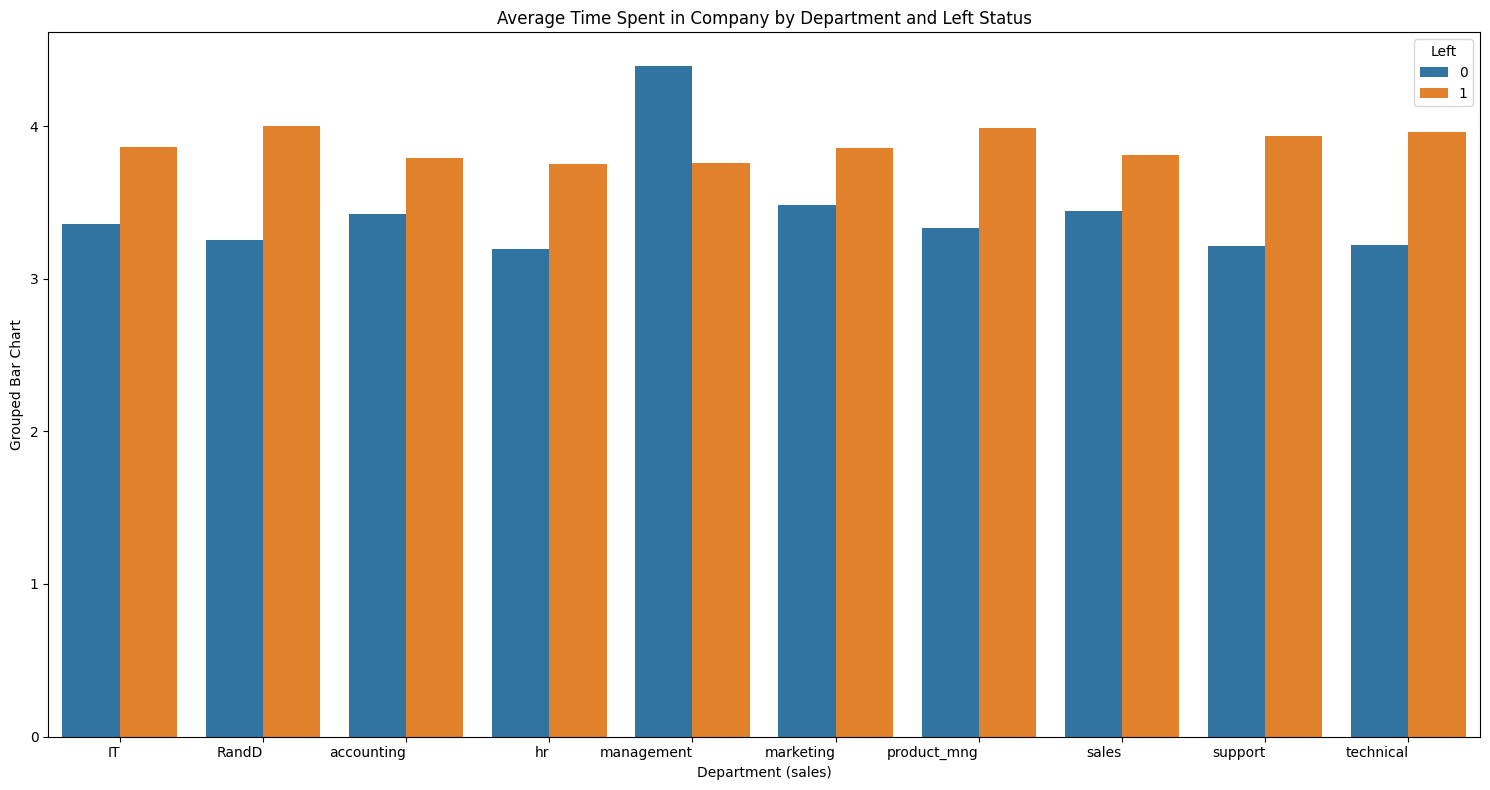

In [66]:
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group")
plt.figure(figsize=(15, 8))
sns.barplot(x='sales', y='avg_time_spend_company', hue='left', data=merged_df)
plt.xlabel('Department (sales)')
plt.ylabel('Grouped Bar Chart')
plt.title('Average Time Spent in Company by Department and Left Status')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Left')
plt.tight_layout()
plt.show()


**9) For output of 3, plot heat map as shown in the image following with the numbers. One approach is to use seaborn.**

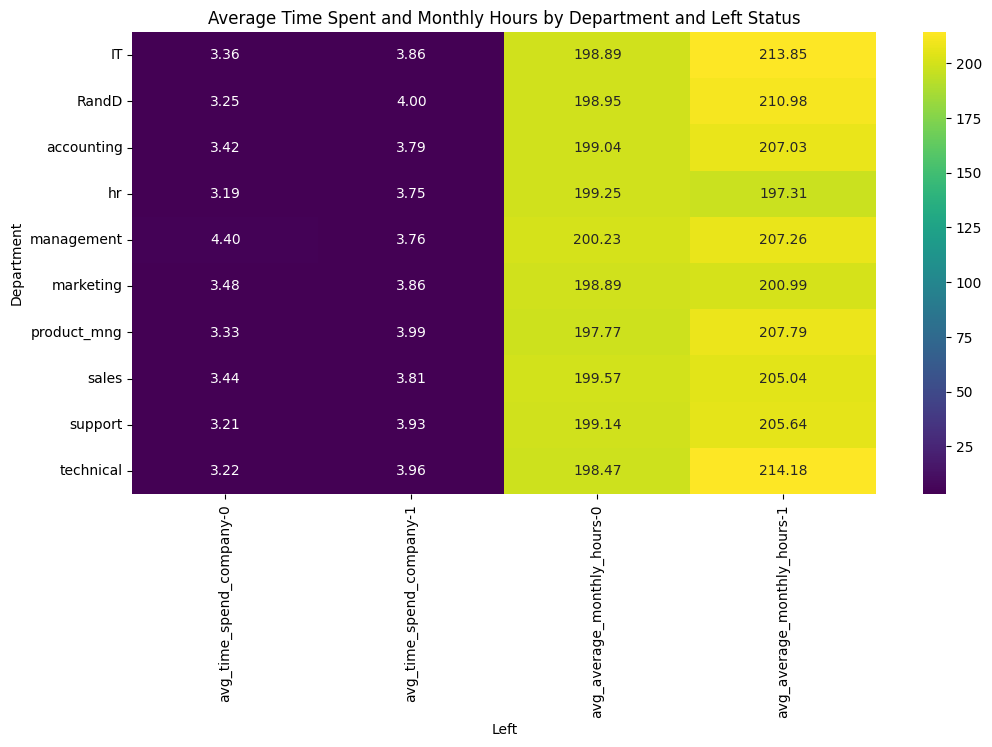

In [ ]:
# Create a pivot table for the heatmap
heatmap_data = avg_time_spend_company_and_hours.pivot(index='sales', columns='left', values=['avg_time_spend_company', 'avg_average_monthly_hours'])

# Plotting the heatmap using seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Time Spent and Monthly Hours by Department and Left Status')
plt.xlabel('Left')
plt.ylabel('Department')
plt.show()